<a href="https://colab.research.google.com/github/NinaAbeyratne/Snaky---Snake-Identification-System/blob/Nina/data_augmentation_snakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


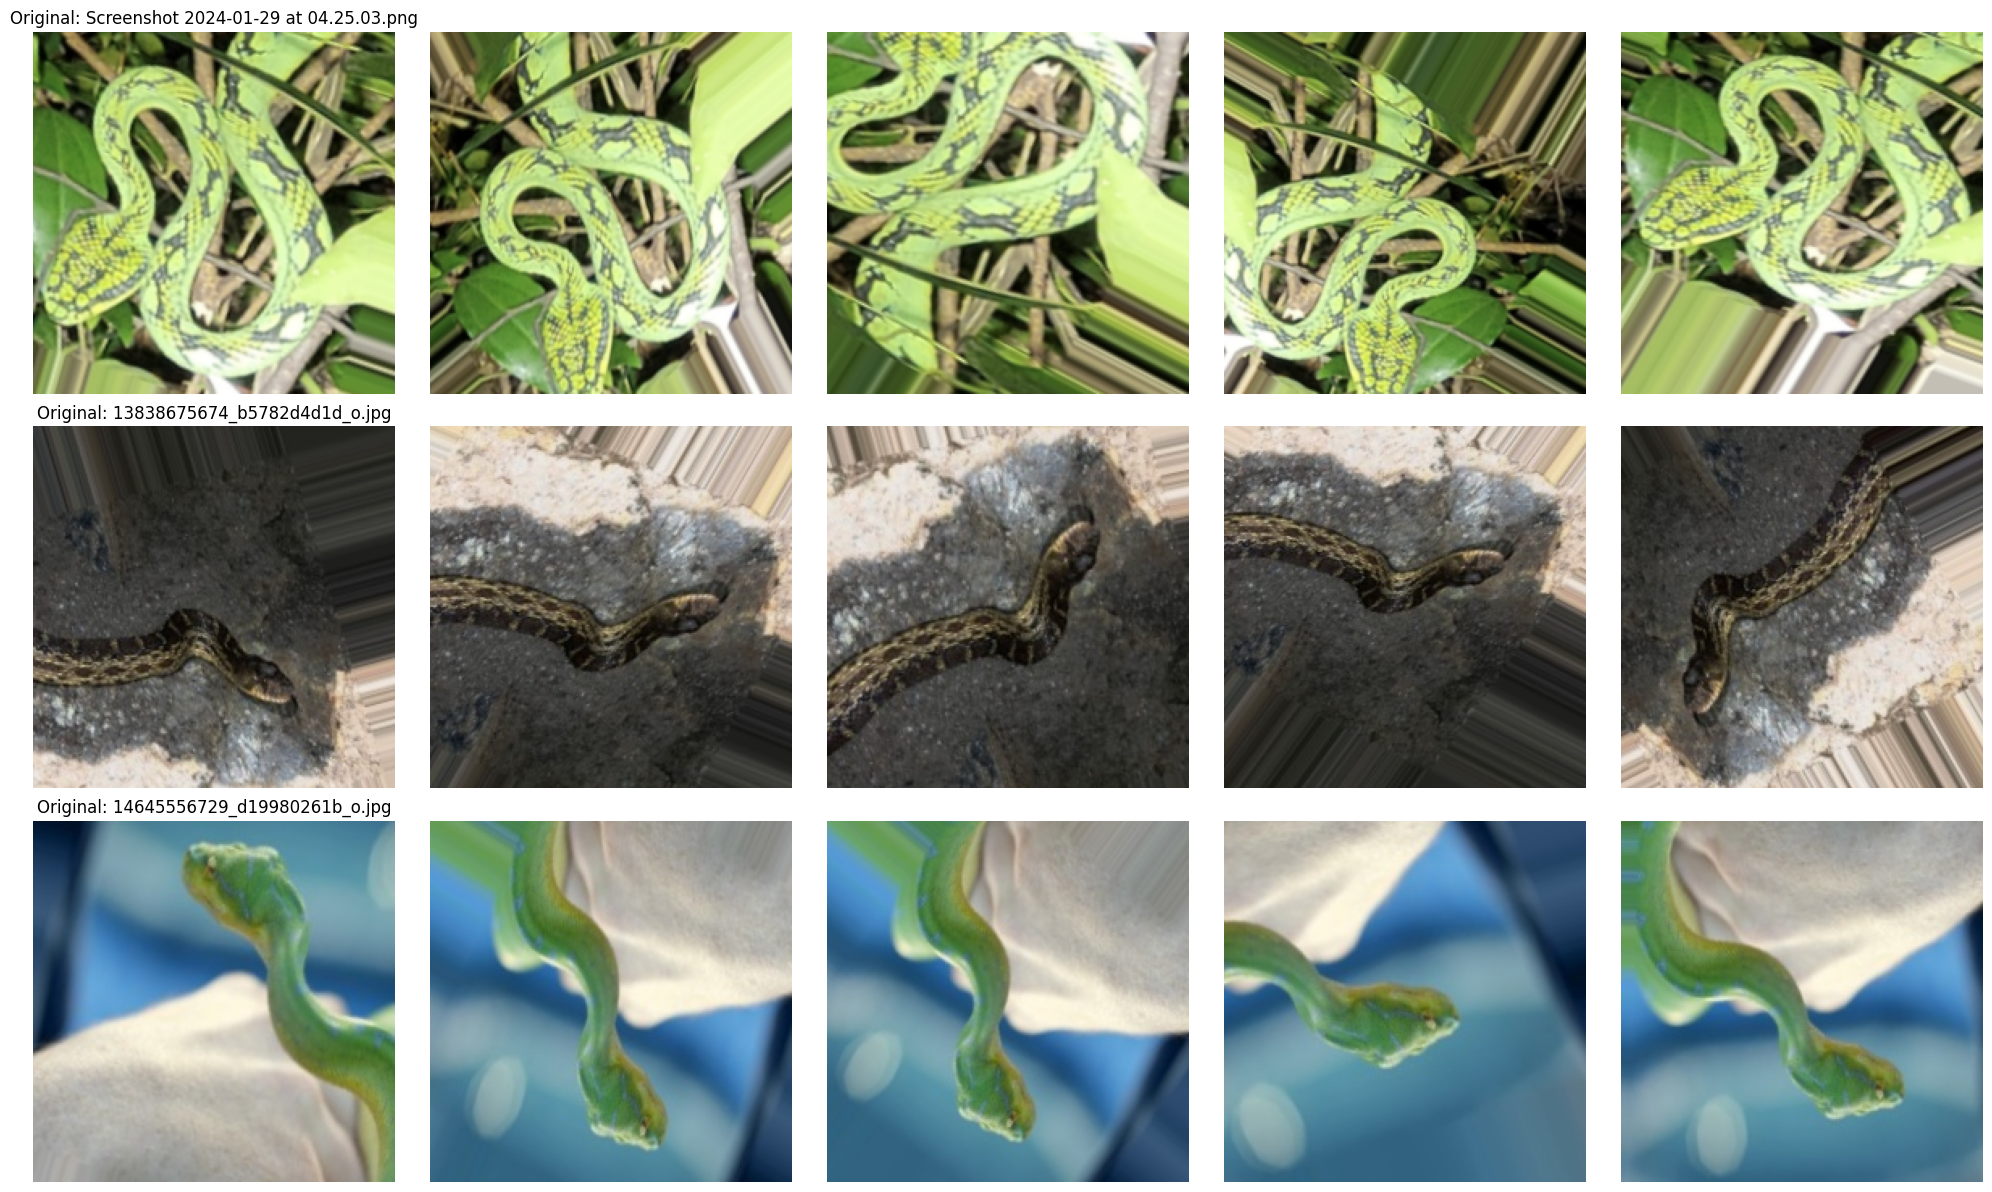

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from keras.preprocessing.image import ImageDataGenerator
import cv2
import random

# Mount Google Drive
drive.mount("/content/drive", force_remount=True)

# Set the path to your dataset
dataset_path = '/content/drive/My Drive/DSGP Group 24/Dataset/Component 1/Snake Images'

# Create a directory to save augmented images
augmented_path = "/content/drive/MyDrive/DSGP Group 24/Dataset/Component 1/augmented_snake_imagess"
os.makedirs(augmented_path, exist_ok=True)

# Define data augmentation generator
data_generator = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    vertical_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Function to augment images and save
def augment_and_save(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (224, 224))  # Resize to 224x224

    # Save original image
    cv2.imwrite(os.path.join(augmented_path, f"original_{os.path.basename(image_path)}"), img)

    # Convert the image to a NumPy array
    x = np.expand_dims(img, axis=0)

    # Generate augmented images
    i = 0
    for batch in data_generator.flow(x, batch_size=1):
        augmented_img = batch[0].astype('uint8')
        augmented_img = cv2.cvtColor(augmented_img, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR
        cv2.imwrite(os.path.join(augmented_path, f"augmented_{i}_{os.path.basename(image_path)}"), augmented_img)
        i += 1
        if i % 5 == 0:
            break

# Iterate through images in the dataset path and augment them
image_paths = []
for filename in os.listdir(dataset_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(dataset_path, filename)
        image_paths.append(image_path)
        augment_and_save(image_path)

# Shuffle the list of image paths
random.shuffle(image_paths)

# Plot a sample of augmented images from three different input images
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
for j, image_path in enumerate(image_paths[:3]):  # Show samples from three different images
    for i in range(5):
        img = plt.imread(os.path.join(augmented_path, f"augmented_{i}_{os.path.basename(image_path)}"))
        axes[j, i].imshow(img)
        axes[j, i].axis('off')
        if i == 0:
            axes[j, i].set_title(f"Original: {os.path.basename(image_path)}")
plt.tight_layout()
plt.show()
